# Introduction

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based
solutions. FicZon major leads generation channel is digital and through their website. FicZon business is
majorly dependent on the sales force effectiveness.

# Statement Problem

As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

# Expected Tasks

1. Explore FicZon data to get insights on sales effectiveness.
2. Build an ML model to predict leads into two categories: High Potential and Low Potential.

# Task 1 
Data Exploration

#### Load the Data and Inspect

We'll load the ficzon_sales.csv file and inspect it to understand its structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('ficzon_sales.csv')

# Display the first few rows of the dataframe
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14/11/2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14/11/2018 9:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14/11/2018 9:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14/11/2018 8:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14/11/2018 7:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [3]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [4]:
# Check for the shape
df.shape

(7422, 9)

#### Data Cleaning

We'll identify and handle missing values, incorrect data types, and any anomalies.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64


In [6]:
# Compute the mode of the 'Product_ID' column
mode_value = df['Product_ID'].mode()[0]
mode_value1 = df['Sales_Agent'].mode()[0]

In [7]:
# Handle missing values and incorrect data types
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Product_ID'] = df['Product_ID'].fillna(mode_value)
df['Source'] = df['Source'].fillna('Other')
df['Sales_Agent'] = df['Sales_Agent'].fillna(mode_value1)
df['Location'] = df['Location'].fillna('Other Locations')

In [8]:
# Display the cleaned dataframe
print(df.head())
print(df.info())

              Created  Product_ID   Source      Mobile               EMAIL  \
0 2018-11-14 10:05:00        18.0  Website  984XXXXXXX  aXXXXXXX@gmail.com   
1 2018-11-14 09:22:00        18.0  Website     XXXXXXX             #VALUE!   
2 2018-11-14 09:21:00        18.0  Website     XXXXXXX  dXXXXXXX@yahoo.com   
3 2018-11-14 08:46:00        18.0  Website     XXXXXXX  wXXXXXXX@gmail.com   
4 2018-11-14 07:34:00        18.0  Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent         Location Delivery_Mode Status  
0  Sales-Agent-11  Other Locations        Mode-5   Open  
1  Sales-Agent-10  Other Locations        Mode-5   Open  
2  Sales-Agent-10  Other Locations        Mode-5   Open  
3  Sales-Agent-10  Other Locations        Mode-5   Open  
4  Sales-Agent-10  Other Locations        Mode-5   Open  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         ------

In [9]:
df['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

We have two values of 'CONVERTED' and 'converted' which means the same thing. So, we are going to merge them into one value.

In [10]:
# Change all values on the Status column to lower case
df['Status'] = df['Status'].str.title()
df['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
Converted                852
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
Lost                     440
Open                      82
Name: Status, dtype: int64

In [11]:
df['Product_ID'].value_counts()

18.0    1769
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [12]:
# Convert 'Created' column to datetime
df['Created'] = pd.to_datetime(df['Created'], format='%d/%m/%Y %H:%M')

# Extract month from 'Created' column
df['Month'] = df['Created'].dt.strftime('%b')

# Order months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [13]:
# Checking the number of entries in the cleaned dataset
num_entries = df.shape[0]
print('The dataset has', num_entries, 'entries.')

The dataset has 7422 entries.


#### Descriptive Statistics
    
Generate summary statistics for numerical columns and frequency counts for categorical columns.

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Summary statistics for numerical columns
print(df.describe(include = ['object']))

       Source   Mobile    EMAIL    Sales_Agent         Location Delivery_Mode  \
count    7422     5612     7422           7422             7422          7422   
unique     25      486      883             12               17             5   
top      Call  XXXXXXX  #VALUE!  Sales-Agent-4  Other Locations        Mode-5   
freq     2547      222     1701           1523             2558          2975   

           Status Month  
count        7422  7422  
unique         10    12  
top     Junk Lead   Jun  
freq         1536  1045  


In [16]:
# Frequency counts for categorical columns
categorical_columns = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']
for col in categorical_columns:
    print(df[col].value_counts())

18.0    1769
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads  

 ## Data Analysis( Sales Effectiveness Analysis)

    
Analyze the distribution of sales over time, top-performing sales agents, effectiveness of different lead sources, impact of different delivery modes on sales, and lead status conversion rates.

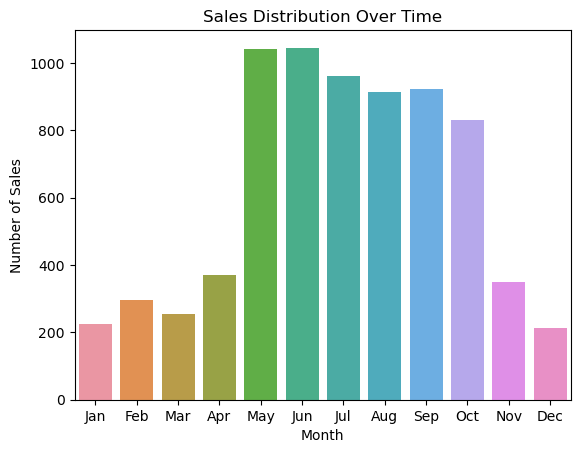

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sales over time
sns.countplot(x = 'Month', data = df, order = month_order)
plt.title('Sales Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

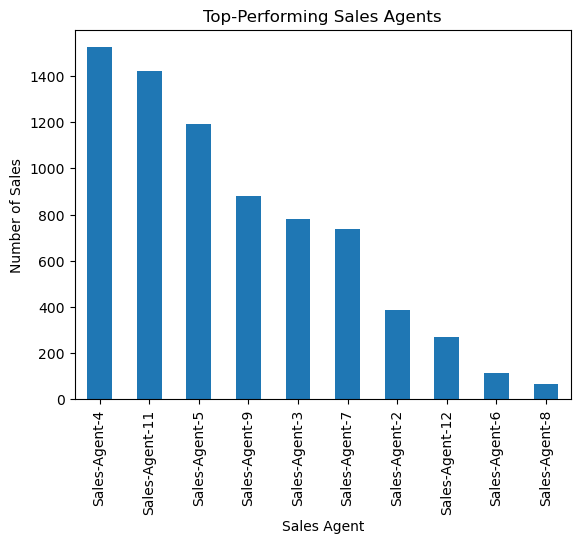

In [18]:
# Top-performing sales agents
top_agents = df['Sales_Agent'].value_counts().head(10)
top_agents.plot(kind='bar')
plt.title('Top-Performing Sales Agents')
plt.xlabel('Sales Agent')
plt.ylabel('Number of Sales')
plt.show()

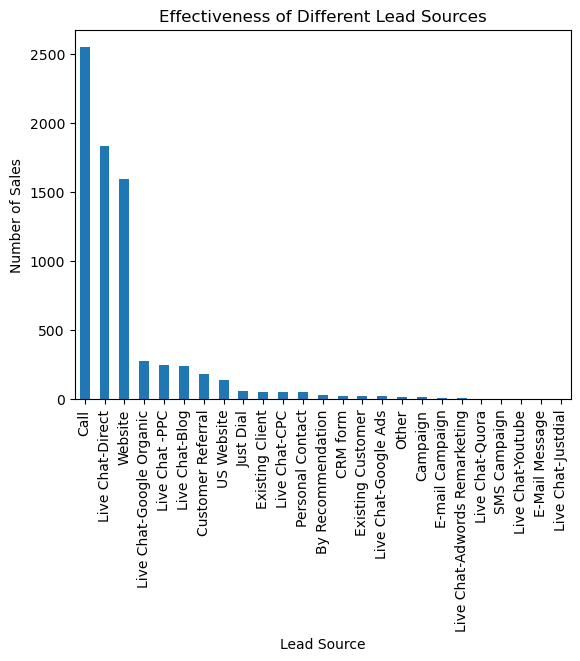

In [19]:
# Effectiveness of different lead sources
lead_sources = df['Source'].value_counts()
lead_sources.plot(kind='bar')
plt.title('Effectiveness of Different Lead Sources')
plt.xlabel('Lead Source')
plt.ylabel('Number of Sales')
plt.show()

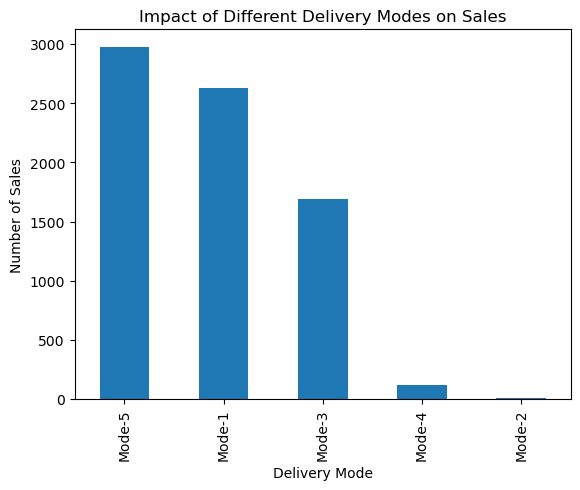

In [20]:
# Impact of different delivery modes on sales
delivery_modes = df['Delivery_Mode'].value_counts()
delivery_modes.plot(kind='bar')
plt.title('Impact of Different Delivery Modes on Sales')
plt.xlabel('Delivery Mode')
plt.ylabel('Number of Sales')
plt.show()

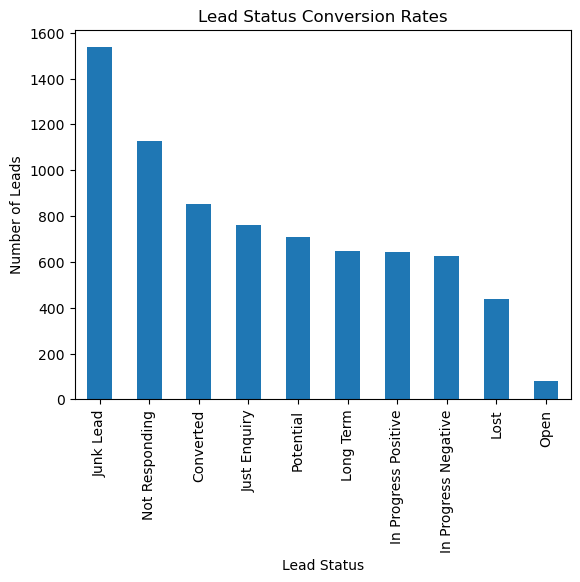

In [21]:
# Lead status conversion rates
lead_status = df['Status'].value_counts()

lead_status.plot(kind='bar')
plt.title('Lead Status Conversion Rates')
plt.xlabel('Lead Status')
plt.ylabel('Number of Leads')
plt.show()

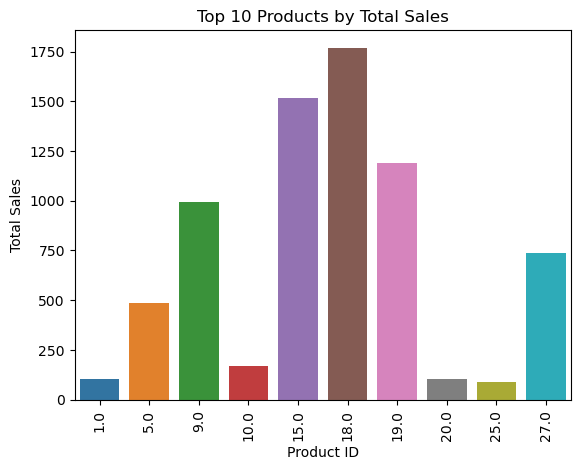

In [22]:
# Total Sales by Product
product_sales = df['Product_ID'].value_counts().reset_index().head(10)
product_sales.columns = ['Product_ID', 'Total_Sales']


# Plotting
sns.barplot(x='Product_ID', y='Total_Sales', data=product_sales)
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

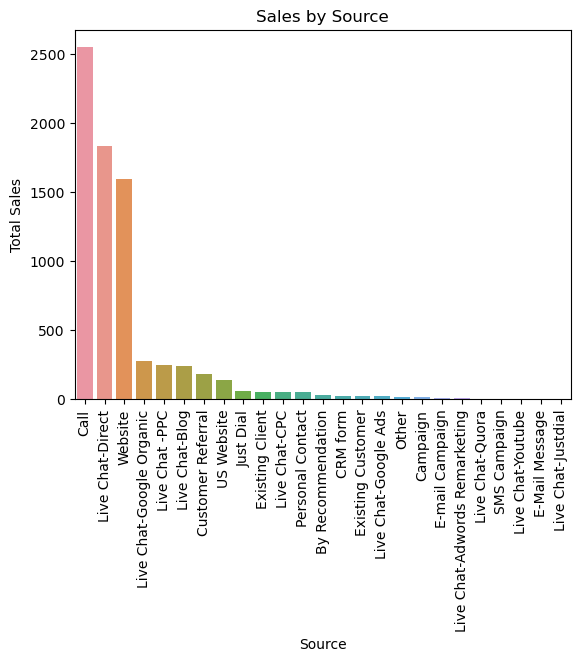

In [23]:
# Sales by Source
source_sales = df['Source'].value_counts().reset_index()
source_sales.columns = ['Source', 'Total_Sales']

# Plotting
sns.barplot(x='Source', y='Total_Sales', data=source_sales)
plt.title('Sales by Source')
plt.xlabel('Source')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.show()

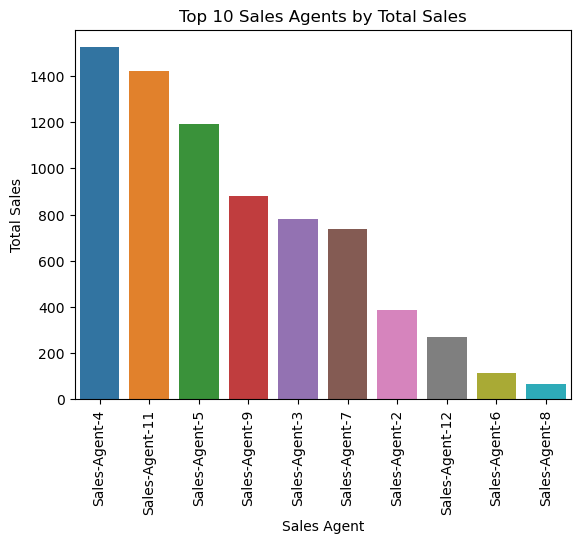

In [24]:
# Sales by Sales Agent
agent_sales = df['Sales_Agent'].value_counts().reset_index()
agent_sales.columns = ['Sales_Agent', 'Total_Sales']

# Plotting
sns.barplot(x='Sales_Agent', y='Total_Sales', data=agent_sales.head(10))
plt.title('Top 10 Sales Agents by Total Sales')
plt.xlabel('Sales Agent')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

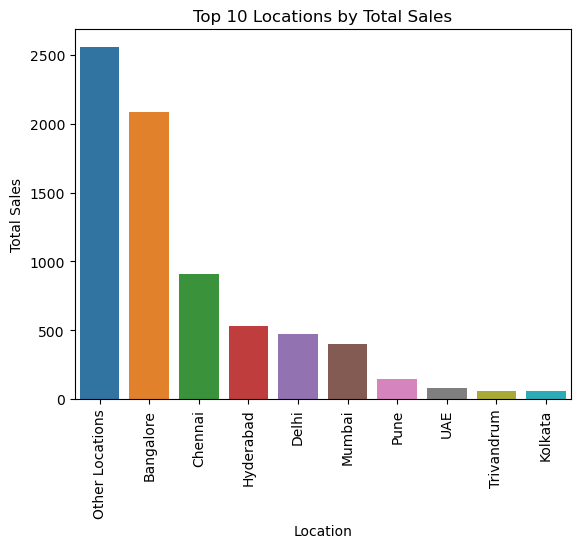

In [25]:
# Sales by Location
location_sales = df['Location'].value_counts().reset_index()
location_sales.columns = ['Location', 'Total_Sales']

# Plotting
sns.barplot(x='Location', y='Total_Sales', data=location_sales.head(10))
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

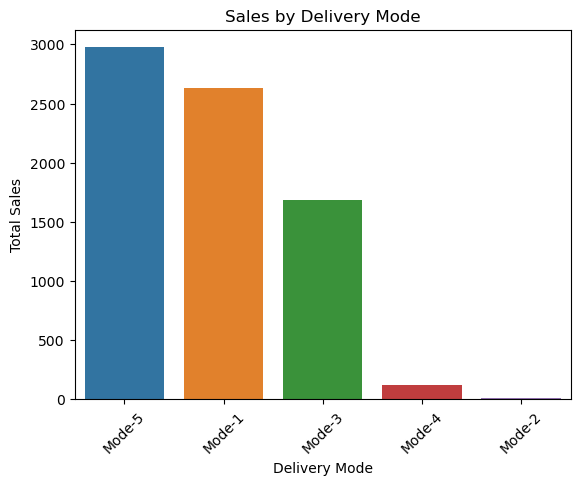

In [26]:
# Sales by Delivery Mode
delivery_mode_sales = df['Delivery_Mode'].value_counts().reset_index()
delivery_mode_sales.columns = ['Delivery_Mode', 'Total_Sales']

# Plotting
sns.barplot(x='Delivery_Mode', y='Total_Sales', data=delivery_mode_sales)
plt.title('Sales by Delivery Mode')
plt.xlabel('Delivery Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

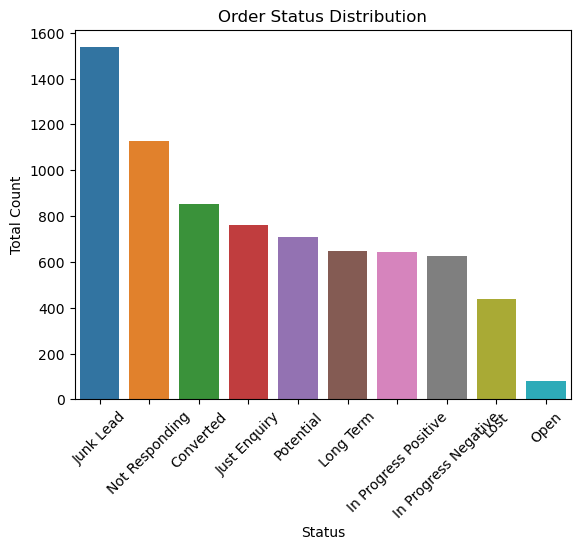

In [27]:
# Status Analysis
status_analysis = df['Status'].value_counts().reset_index()
status_analysis.columns = ['Status', 'Total_Count']

# Plotting
sns.barplot(x='Status', y='Total_Count', data=status_analysis)
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# Task 2
Building an ML model to predict lead category.

#### Feature Engineering & Selection
Categorize the customers into 'High potential' and 'Low potential' based on their lead category status.

Select necessary features.

In [28]:
# Define high potential statuses
high_potential_statuses = ['Converted', 'Potential', 'Long Term', 'In Progress Positive', 'Open']

In [29]:
# Classify each lead based on the 'Status' column
df['Lead_Potential'] = df['Status'].apply(lambda x: 'High' if x in high_potential_statuses else 'Low')

In [30]:
df['Lead_Potential_Stat'] = df['Lead_Potential'].map({'High':1, 'Low':0})

In [31]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Month,Lead_Potential,Lead_Potential_Stat
0,2018-11-14 10:05:00,18.0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,Nov,High,1
1,2018-11-14 09:22:00,18.0,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,Nov,High,1
2,2018-11-14 09:21:00,18.0,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,Nov,High,1
3,2018-11-14 08:46:00,18.0,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Nov,High,1
4,2018-11-14 07:34:00,18.0,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Nov,High,1


In [32]:
# Drop all columns not needed for model building
df_ml = df.drop(columns =['Created', 'Mobile', 'EMAIL', 'Status', 'Month', 'Lead_Potential'])
df_ml

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Lead_Potential_Stat
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,1
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,0
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,0
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,0
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,0


In [33]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           7422 non-null   float64
 1   Source               7422 non-null   object 
 2   Sales_Agent          7422 non-null   object 
 3   Location             7422 non-null   object 
 4   Delivery_Mode        7422 non-null   object 
 5   Lead_Potential_Stat  7422 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 348.0+ KB


In [34]:
# Change the product id feature to a string
df_ml['Product_ID'] = df_ml['Product_ID'].astype(str)

In [35]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_ID           7422 non-null   object
 1   Source               7422 non-null   object
 2   Sales_Agent          7422 non-null   object
 3   Location             7422 non-null   object
 4   Delivery_Mode        7422 non-null   object
 5   Lead_Potential_Stat  7422 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 348.0+ KB


In [36]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_ml, columns=['Product_ID','Source', 'Sales_Agent', 'Location', 'Delivery_Mode'])

In [37]:
df_encoded.head()

,Lead_Potential_Stat,Product_ID_0.0,Product_ID_1.0,Product_ID_10.0,Product_ID_11.0,Product_ID_12.0,Product_ID_13.0,Product_ID_14.0,Product_ID_15.0,Product_ID_16.0,...,Location_Singapore,Location_Trivandrum,Location_UAE,Location_UK,Location_USA,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building

In [38]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings(action='ignore')

In [39]:
# Split data into X and y
X = df_encoded.drop(columns =['Lead_Potential_Stat'])
y = df_encoded['Lead_Potential_Stat']

In [40]:
# Split into Xtrain and ytrain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the models

In [41]:
# instantiate the models
models = [
    (LogisticRegression(max_iter=1000, random_state = 42)),
    (DecisionTreeClassifier(random_state = 42)),
    (RandomForestClassifier(random_state = 42))
]

In [42]:
# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model} Classification Report:\n{classification_report(y_test, y_pred)}\n")

LogisticRegression(max_iter=1000, random_state=42) Accuracy: 0.7192
LogisticRegression(max_iter=1000, random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       890
           1       0.69      0.55      0.61       595

    accuracy                           0.72      1485
   macro avg       0.71      0.69      0.70      1485
weighted avg       0.72      0.72      0.71      1485


DecisionTreeClassifier(random_state=42) Accuracy: 0.6808
DecisionTreeClassifier(random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       890
           1       0.62      0.51      0.56       595

    accuracy                           0.68      1485
   macro avg       0.67      0.65      0.66      1485
weighted avg       0.67      0.68      0.67      1485


RandomForestClassifier(random_state=42) Accuracy: 0.6963
RandomForestClassifier(ra

Our models did not perform so well. The highest accuracy score is from the Logistic regression model with about 72% accuracy. We will apply hyperparameter tuning to get the best from them.

## Hyperparameter Tuning

In [43]:
# Let us define the parameter grids for each algorithm

# For logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# For decision tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 10, 20]
}

# For random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2']
}

In [44]:
# Tuning the models
models_2 = [
    ("Logistic Regression", LogisticRegression(random_state=42), param_grid_lr),
    ("Decision Tree", DecisionTreeClassifier(random_state=42), param_grid_dt),
    ("Random Forest", RandomForestClassifier(random_state=42), param_grid_rf)
]

In [45]:
# We will iterate over our models to get the best
for name, model, param_grid in models_2:
    print(f"Tuning hyperparameters for {name}...")

     # Perform randomized search
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Print best parameters and score
    print(f"Best parameters for {name}:", random_search.best_params_)
    print(f"Best score for {name}:", random_search.best_score_)

    # Find and use the best estimator
    best_model = random_search.best_estimator_

    # Make predictions
    y_pred2 = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred2)
    print(f"Accuracy on test set for {name}: {accuracy:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}
Best score for Logistic Regression: 0.7170290379220455
Accuracy on test set for Logistic Regression: 0.7192

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'min_samples_split': 10, 'max_depth': 10}
Best score for Decision Tree: 0.7042276173699932
Accuracy on test set for Decision Tree: 0.7017

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'max_features': 'log2'}
Best score for Random Forest: 0.7005246228076893
Accuracy on test set for Random Forest: 0.6970



We can still further explore other algorithms

In [46]:
# import library
import xgboost as xgb

In [47]:
# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [48]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [49]:
# Tuning the hyperparameters
print("Tuning hyperparameters for XGBoost...")

# Perform randomized search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)

# Printing best parameters and score
print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")
print(f"Best score for XGBoost: {random_search_xgb.best_score_}")

# best estimator
best_xgb = random_search_xgb.best_estimator_

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy on test set for XGBoost: {accuracy_xgb:.4f}")

Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best score for XGBoost: 0.7185440476089171
Accuracy on test set for XGBoost: 0.7273


Our best model so far is the XGBoost with training accuracy and testing accuracy of about 72% and 73% respectively. This shows that the model does not underfit even though it performed slightly higher during testing than in training. We can still go ahead to test other algorithms like SVM and SGD.

In [50]:
from sklearn.svm import LinearSVC

In [51]:
# Initialize the SVC classifier
model_svc = LinearSVC(random_state = 42)

In [52]:
# fit the model and print report
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       890
           1       0.69      0.54      0.61       595

    accuracy                           0.72      1485
   macro avg       0.71      0.69      0.69      1485
weighted avg       0.72      0.72      0.71      1485



The SVM also did well in the testing with accuracy of 72%. We can proceed to test the SGD classifier.

In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
# Instantiate the model
model_sgd = SGDClassifier(loss='hinge', random_state= 42)

In [55]:
# fit the model and print report
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       890
           1       0.70      0.53      0.60       595

    accuracy                           0.72      1485
   macro avg       0.71      0.69      0.69      1485
weighted avg       0.72      0.72      0.71      1485



Here also, the model has an accuracy score of about 72%. We can go ahead and print the classification report for the best performing model and see the details of its performance.

In [56]:
# Printing classification report for the best model (XGB)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       890
           1       0.70      0.55      0.62       595

    accuracy                           0.73      1485
   macro avg       0.72      0.70      0.70      1485
weighted avg       0.72      0.73      0.72      1485



For class 0, the precision is 0.74, meaning that when the model predicts class 0, it is correct 74% of the time, while it is slightly lower when it predicts class 1.

The F1-score is 0.79, indicating a good balance between precision and recall for this class 0.

Overall, The model has an accuracy of 73%, which means it correctly predicts the outcome 73% of the time.

In [57]:
# Find the important features that mattered in the XGBoost model
feature_importance = best_xgb.get_booster().get_score(importance_type='gain')

In [58]:
# Sorting the feature importance in descending order and rounding it to two decimal places
sorted_feature_importance = sorted(
    ((feature, round(importance, 2)) for feature, importance in feature_importance.items()),
    key=lambda kv: kv[1],
    reverse=True
)

In [59]:
# Printing the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Product_ID_15.0, Importance: 47.17
Feature: Location_Other Locations, Importance: 15.71
Feature: Sales_Agent_Sales-Agent-10, Importance: 13.01
Feature: Sales_Agent_Sales-Agent-9, Importance: 8.94
Feature: Location_Bangalore, Importance: 7.54
Feature: Source_Customer Referral, Importance: 7.22
Feature: Source_Existing Client, Importance: 5.05
Feature: Source_Just Dial, Importance: 4.69
Feature: Sales_Agent_Sales-Agent-8, Importance: 4.47
Feature: Sales_Agent_Sales-Agent-12, Importance: 4.31
Feature: Product_ID_1.0, Importance: 4.08
Feature: Sales_Agent_Sales-Agent-5, Importance: 3.95
Feature: Source_By Recommendation, Importance: 3.79
Feature: Location_Chennai, Importance: 3.51
Feature: Product_ID_5.0, Importance: 3.33
Feature: Product_ID_18.0, Importance: 3.23
Feature: Location_Kolkata, Importance: 3.2
Feature: Product_ID_19.0, Importance: 3.07
Feature: Source_Personal Contact, Importance: 3.07
Feature: Sales_Agent_Sales-Agent-3, Importance: 2.94
Feature: Source_Live Chat-Blog

In [60]:
# we can plot a graph of this

# Select the top 10 features
top_n = 10
top_features = sorted_feature_importance[:top_n]

In [61]:
# Extract feature names and importance values
features = [feature for feature, importance in top_features]
importances = [importance for feature, importance in top_features]

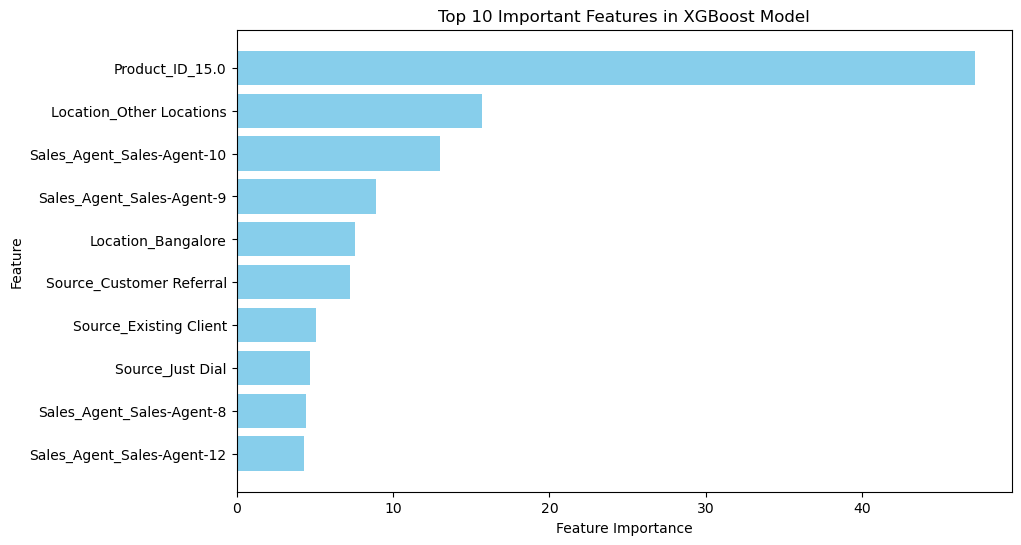

In [62]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features in XGBoost Model')
plt.gca().invert_yaxis();

Here’s a summary of the top 10 features based on their importance scores:

- Feature: Product_ID_15.0, Importance: 47.17
- Feature: Location_Other Locations, Importance: 15.71
- Feature: Sales_Agent_Sales-Agent-10, Importance: 13.01
- Feature: Sales_Agent_Sales-Agent-9, Importance: 8.94
- Feature: Location_Bangalore, Importance: 7.54
- Feature: Source_Customer Referral, Importance: 7.22
- Feature: Source_Existing Client, Importance: 5.05
- Feature: Source_Just Dial, Importance: 4.69
- Feature: Sales_Agent_Sales-Agent-8, Importance: 4.47
- Feature: Sales_Agent_Sales-Agent-12, Importance: 4.31

With product 15 having quite higher importance compared to other features, we have to talk to the domain experts to understand more about the products and what makes one product different from another. This is because after dropping the Product_ID feature, the models did not do so well.

Understanding each product will help us re-adjust our features for better machine learning predictions.

## Summary

We can summarize the features as follows:

Product ID 15 has a high importance score, indicating that it is an important predictor in the model. Its influence on the target variable is paramount, suggesting that whatever attributes associated with this product significantly affect the outcome.

Other locations is the second most influential feature, indicating that other locations have substantial impact on the model’s predictions. It means that activities specific to other locations are highly relevant to the outcome.

Sales agents 9 and 10 are key contributors to the outcome, suggesting their interactions, strategies, or client handling are particularly effective.

Customer Referral is a strong indicator that referrals from customers are a significant source of leads or business, impacting the target variable more than other sources.

Bangalore is another important location that brings in more business to the organization.

Existing Client indicates that repeat business or ongoing client relationships are important, potentially due to trust or satisfaction from previous interactions.

## Recommendations

#### Product Focus
Given the importance of Product 15, it would be beneficial to analyze why this product stands out and consider strategies to leverage its success for other products.
#### Location Strategy
Tailor marketing and operational strategies to capitalize on the significance of Bangalore and other locations, as they are key locations influencing the outcomes.
#### Sales Agent Development
Identify the successful tactics used by top-performing sales agents and provide training to others to elevate overall sales performance.
#### Maximize Effective Channels
Strengthen customer referral programs and maintain relationships with existing clients, as these sources are highly valuable.
#### Optimize Lead Generation
Maintain and strengthen the channels of customer referrals and Just Dial, as they are proven to be effective sources of leads.

## Conclusion

The model’s predictive power is heavily influenced by a specific product, certain locations, and the effectiveness of sales agents and lead sources. Focusing on these areas could enhance business strategies and decision-making processes.  Continuous evaluation and adaptation of the model are recommended to maintain its relevance and accuracy.